# Análisis estadístico de los niveles de ruido en una avenida

En este notebook se presenta el análisis estadístico de los datos recabados por los sonómetros desplegados en la avenida Eje 5 Norte. La finalidad es conocer los niveles de ruido a los que se expone la población cercana. En particular, son de interés los siguientes parámetros estadísticos:

* El valor en decibeles por el cual el nivel de ruido acústico rebasa los 65 dB (nivel considerado como dañino para la salud auditiva de las personas). Este parámetro lo denotaremos como $n_{65}$.
* El intervalo de tiempo durante el cual el nivel de ruido acústico rebasa los 65 dB. Este parámetro lo denotaremos como $t_{65}$.
* El tiempo entre eventos en los que el nivel de ruido rebasa los 65 dB. Este parámetro lo denotaremos como $t_e$.
* El valor promedio del nivel de ruido cuando rebasa el umbral de 65db. Este parámetro se se denota como $L_{65}$.

Los parámetros anteriormente mencionados son variables aleatorias, por lo que el programa computacional a desarrollar obtendrá el histograma normalizado de cada una de ellas, así como algunos de sus momentos estadísticos (valor medio, coeficiente de variación, entre otros).


## Características del sistema de adquisición de niveles de ruido

Se trata de una red de cuatro sonómetros desplegados en la Avenida Eje 5 Norte, al lado de la estación de Metrobús UAM Azcapotzalco. Los sonómetros midieron el nivel equivalente de ruido (Leq) cada segundo y enviaron los datos a un servidor central. Las mediciones se realizaron el día 28 de mayo, desde las 7:30 a.m. hasta el 29 de mayo a las 6:00 a.m.


<img src="despliegue_nodos.png">



## Analisis general
A continuacion se muestra un analisis general de los datos recabados por los cuatro nodos

* Histograma.
* Promedio de los niveles de ruido.
* Desviacion estandar de los  niveles de ruido.
* Mediana de los niveles de ruido.

In [58]:
import pandas as pd

df1=pd.read_csv('dataframe_sono1.csv')
df2=pd.read_csv('dataframe_sono2.csv')
df3=pd.read_csv('dataframe_sono3.csv')
df4=pd.read_csv('dataframe_sono4.csv')
df = {'sono1':df1, 'sono2':df2, 'sono3':df3, 'sono4':df4}

In [59]:
# Crear un data frame con los parametros estadisticos generales
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df:
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df[sono]['value'].mean()
    # desviacion estandar
    desv_value = df[sono]['value'].std()
    # mediana
    med_value = df[sono]['value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_parametros_generales=pd.DataFrame(data, columns=col, index=ind)
df_parametros_generales

,Promedio,Desviacion_estandar,Mediana
sono1,64.352473,7.430212,64.93
sono2,64.117782,7.642283,65.17
sono3,55.936148,8.022884,57.17
sono4,64.398347,7.897464,65.50


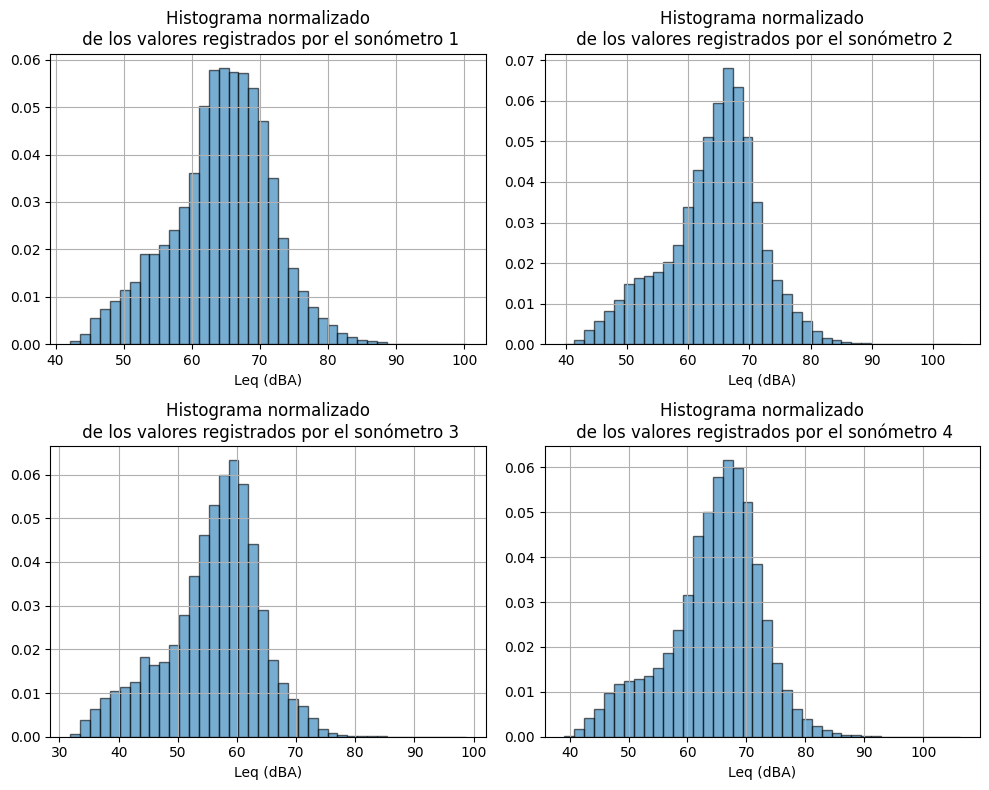

In [60]:
# Generacion de un histograma general para cada sonometro
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Histograma del sonomtro 1
[n, bins, patches]=axs[0, 0].hist(df['sono1']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[0, 0].set_title('Histograma normalizado\n de los valores registrados por el sonómetro 1')
axs[0, 0].set_xlabel('Leq (dBA)')
# axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].grid(True)

# Histograma del sonometro 2
[n, bins, patches]=axs[0, 1].hist(df['sono2']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[0, 1].set_title('Histograma normalizado\n de los valores registrados por el sonómetro 2')
axs[0, 1].set_xlabel('Leq (dBA)')
# axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].grid(True)

# Histograma del sonometro 3
[n, bins, patches]=axs[1, 0].hist(df['sono3']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[1, 0].set_title('Histograma normalizado\n de los valores registrados por el sonómetro 3')
axs[1, 0].set_xlabel('Leq (dBA)')
# axs[1, 0].set_ylabel('Frecuencia')
axs[1, 0].grid(True)

# Histograma del sonometro 4
[n, bins, patches]=axs[1, 1].hist(df['sono4']['value'], bins=40, edgecolor='k', alpha=0.6, density=True)
axs[1, 1].set_title('Histograma normalizado\n de los valores registrados por el sonómetro 4')
axs[1, 1].set_xlabel('Leq (dBA)')
# axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].grid(True)

fig.tight_layout()
plt.show()

### Analisis para el nivel de ruido durante el periodo diurno y noctutno
A continuacion se presenta un analisis estadistico de los niveles de ruido registrados durante el periodo diurno (6:00 - 20:00) y nocturno (6:00 - 20:00).

#### Periodo diurno

In [61]:
# Definir el rango de tiempo deseado
start_time = '2024-05-28 06:00:00'
end_time = '2024-05-28 20:00:00'

# Crear un data frame con los parametros estadisticos del periodo diurno
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df:
    # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = filtered_df['value'].mean()
    # desviacion estandar
    desv_value = filtered_df['value'].std()
    # mediana
    med_value = filtered_df['value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_parametros_diurnos=pd.DataFrame(data, columns=col, index=ind)
df_parametros_diurnos

,Promedio,Desviacion_estandar,Mediana
sono1,67.685636,5.266479,67.32
sono2,67.540743,5.138155,67.19
sono3,59.582413,5.222780,59.38
sono4,67.613555,5.312730,67.48


#### Periodo nocturno

In [62]:
# Definir el rango de tiempo deseado
start_time = '2024-05-28 20:00:00'
end_time = '2024-05-29 06:00:00'

# Crear un data frame con los parametros estadisticos del periodo dnocturno
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df:
    # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = filtered_df['value'].mean()
    # desviacion estandar
    desv_value = filtered_df['value'].std()
    # mediana
    med_value = filtered_df['value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_parametros_diurnos=pd.DataFrame(data, columns=col, index=ind)
df_parametros_diurnos

,Promedio,Desviacion_estandar,Mediana
sono1,60.467591,7.693419,60.42
sono2,59.868368,8.095267,60.02
sono3,50.245815,8.313880,50.13
sono4,59.232425,8.598613,59.52


#### Niveles percentiles
Los niveles percentiles de ruido son métricas que ayudan a entender la variabilidad y la distribución de los niveles de ruido en un período de tiempo. Un nivel percentil, como el L10, indica que el nivel de ruido fue igual o superado durante el 10% del tiempo. De manera similar, el L50 y el L90 indican los niveles de ruido que se igualaron o superaron el 50% y el 90% del tiempo, respectivamente. Estos valores son útiles para identificar los niveles de ruido más comunes y los picos de ruido en un entorno específico.

In [63]:
# crear un dataframe con los niveles percentiles de cada sonometro
data = []
col = ['L10', 'L50', 'L90']
ind = []
for sono in df:
    L10 = df[sono]['value'].quantile(0.10)
    L50 = df[sono]['value'].quantile(0.50)
    L90 = df[sono]['value'].quantile(0.90)
    data.append([L10, L50, L90])
    ind.append(sono)
df_percentiles = pd.DataFrame(data, columns=col, index=ind)
df_percentiles

,L10,L50,L90
sono1,53.80,64.93,72.93
sono2,52.79,65.17,72.77
sono3,44.04,57.17,64.82
sono4,52.60,65.50,73.24


## Identificación de los eventos ruidosos

Con el fin de encontrar los parámetros estadísticos mencionados al inicio de este documento, es útil buscar, a lo largo del tiempo, "eventos ruidosos" en los cuales los niveles de ruido rebasan el umbral de 65 dB. Se considerará que un evento inicia cuando el ruido supera este umbral y termina cuando decae por debajo de él. Las características de estos eventos son:
+ Hora en que inicia: `start_time`.
+ Hora en que finaliza: `end_time`.
+ Valor máximo del ruido durante este evento: `max_values`.
+ Valor promedio del ruido durante este evento: `avg_values`.


### Estadistica general de los eventos ruidosos
A continuacion se presentan el promedio, media y desviacion estandar de cada uno de los parametros de los eventos ruidosos. 

In [64]:
# cargar los dataframes de los eventos ruidosos
df1=pd.read_csv('dataframe_eventos_sono1.csv')
df2=pd.read_csv('dataframe_eventos_sono2.csv')
df3=pd.read_csv('dataframe_eventos_sono3.csv')
df4=pd.read_csv('dataframe_eventos_sono4.csv')
df_eventos = {'sono1':df1, 'sono2':df2, 'sono3':df3, 'sono4':df4}
df_eventos['sono1']

,start_time,end_time,max_value,avg_value,length,duration,time_diff
0,2024-05-28 07:31:01+00:00,2024-05-28 07:31:05+00:00,75.11,70.852500,4,4.0,4.0
1,2024-05-28 07:31:14+00:00,2024-05-28 07:31:17+00:00,80.73,76.856667,3,3.0,13.0
2,2024-05-28 07:31:18+00:00,2024-05-28 07:31:25+00:00,75.34,71.037143,7,7.0,4.0
3,2024-05-28 07:31:58+00:00,2024-05-28 07:32:01+00:00,70.73,69.600000,3,3.0,40.0
4,2024-05-28 07:32:08+00:00,2024-05-28 07:32:13+00:00,73.84,68.658000,5,5.0,10.0
...,...,...,...,...,...,...,...
1784,2024-05-29 05:57:16+00:00,2024-05-29 05:57:29+00:00,75.30,71.155385,13,13.0,32.0
1785,2024-05-29 05:58:05+00:00,2024-05-29 05:58:09+00:00,68.85,67.862500,4,4.0,49.0
1786,2024-05-29 05:58:17+00:00,2024-05-29 05:58:36+00:00,83.43,71.321579,19,19.0,12.0
1787,2024-05-29 05:58:48+00:00,2024-05-29 05:59:01+00:00,83.36,73.982308,13,13.0,31.0


#### Duración de los eventos ruidosos

In [65]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['duration'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['duration'].std()
    # mediana
    med_value = df_eventos[sono]['duration'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_duracion_eventos=pd.DataFrame(data, columns=col, index=ind)
df_duracion_eventos

,Promedio,Desviacion_estandar,Mediana
sono1,19.569592,30.542875,8.0
sono2,20.212566,31.622489,8.0
sono3,6.380156,4.313777,5.0
sono4,21.577970,33.389290,9.0


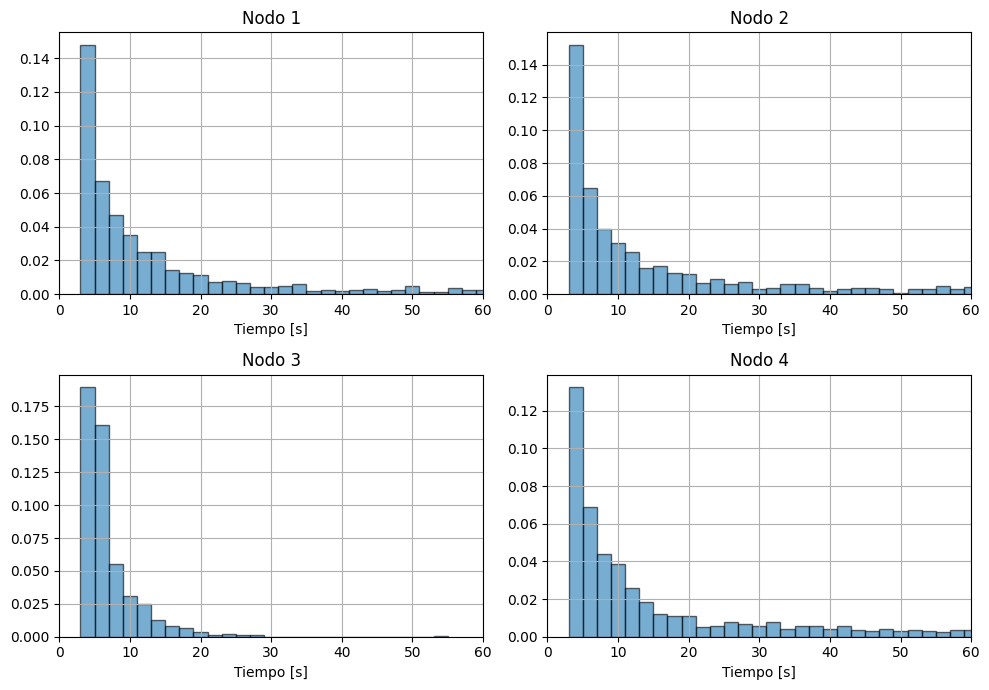

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 2
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['duration'].min()
        max_data = df_eventos[f'sono{sono}']['duration'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['duration'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        # axs[i, j].set_title(f'Histograma normalizado\nde la duración de los eventos ruidosos\nregistrados por el sonómetro {sono}')
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Tiempo [s]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        axs[i, j].set_xlim([0, 60])

fig.tight_layout()
plt.show()

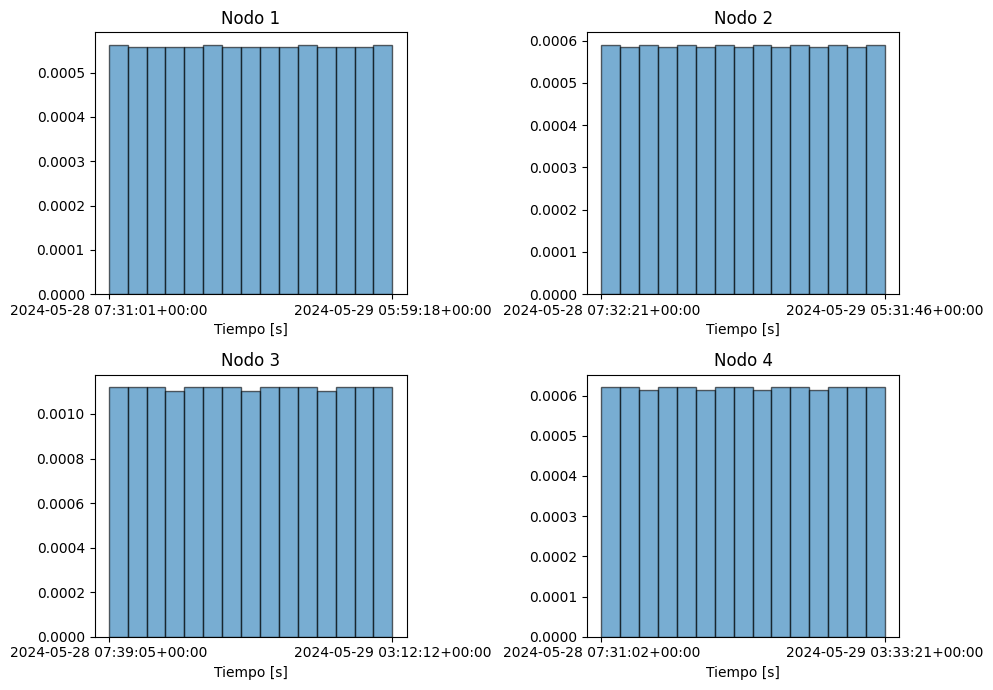

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 20
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['start_time'].min()
        max_data = df_eventos[f'sono{sono}']['start_time'].max()
        # bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['start_time'], bins=15, edgecolor='k', alpha=0.6, density=True)
        # axs[i, j].set_title(f'Histograma normalizado\nde la duración de los eventos ruidosos\nregistrados por el sonómetro {sono}')
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Tiempo [s]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(False)
        # axs[i, j].set_xlim([0, 60])
        axs[i, j].set_xticks([min_data, max_data])

fig.tight_layout()
plt.show()

#### Valor promedio del nivel de los eventos ruidosos


In [68]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['avg_value'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['avg_value'].std()
    # mediana
    med_value = df_eventos[sono]['avg_value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_duracion_eventos=pd.DataFrame(data, columns=col, index=ind)
df_duracion_eventos

,Promedio,Desviacion_estandar,Mediana
sono1,68.840024,2.287323,68.613333
sono2,68.623719,2.156365,68.291000
sono3,68.562116,1.893817,68.450000
sono4,68.857056,2.189170,68.638833


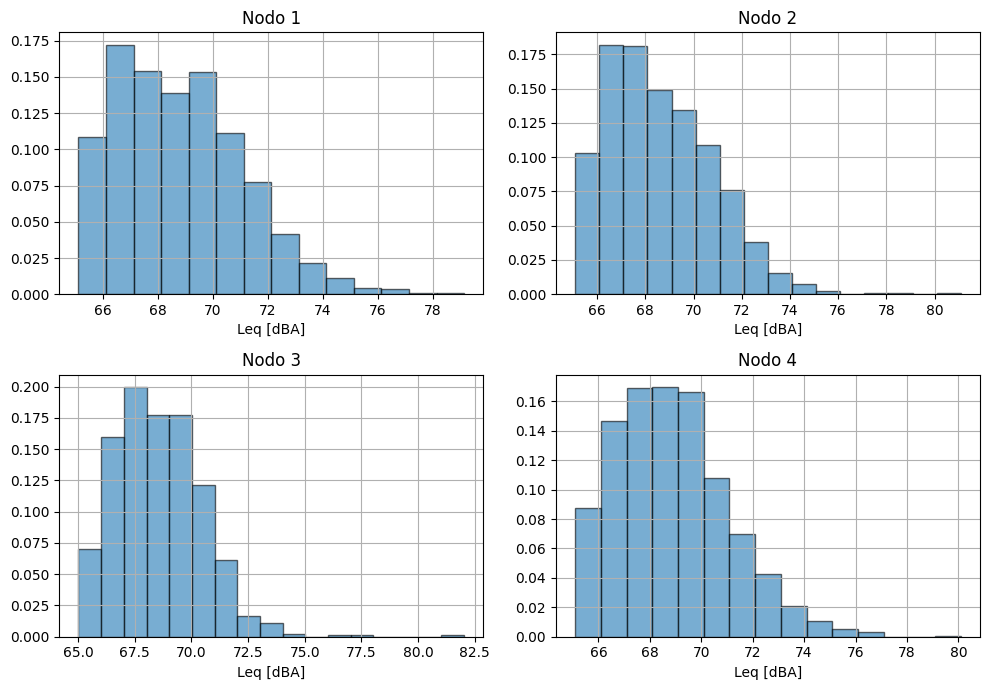

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 1
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['avg_value'].min()
        max_data = df_eventos[f'sono{sono}']['avg_value'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['avg_value'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        # axs[i, j].set_title(f'Histograma normalizado\ndel valor promedio de los eventos ruidosos\nregistrados por el sonómetro {sono}')
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Leq [dBA]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        # axs[i, j].set_xlim([0, 100])

fig.tight_layout()
plt.show()

#### Tiempo entre eventos ruidosos

In [70]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['time_diff'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['time_diff'].std()
    # mediana
    med_value = df_eventos[sono]['time_diff'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_duracion_eventos=pd.DataFrame(data, columns=col, index=ind)
df_duracion_eventos

,Promedio,Desviacion_estandar,Mediana
sono1,44.233091,52.174118,26.0
sono2,44.758074,50.357840,27.0
sono3,78.491639,131.393570,45.0
sono4,43.795173,48.615069,27.0


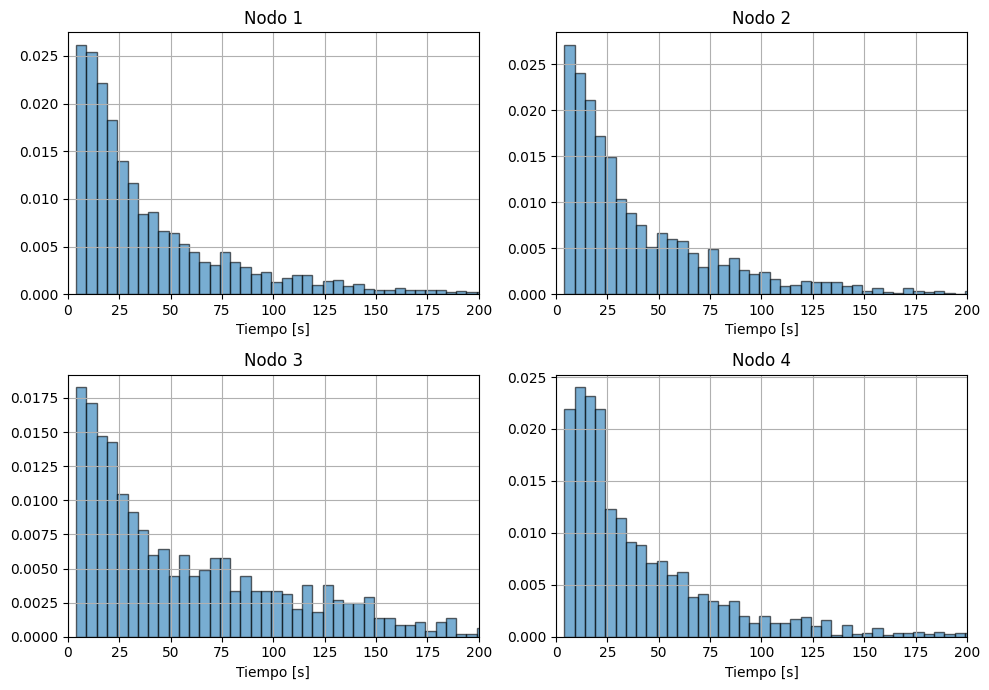

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 5
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['time_diff'].min()
        max_data = df_eventos[f'sono{sono}']['time_diff'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['time_diff'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Tiempo [s]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        axs[i, j].set_xlim([0, 200])

fig.tight_layout()
plt.show()

In [72]:
events_df=df_eventos['sono1'].sort_values(by='duration')
events_df

,start_time,end_time,max_value,avg_value,length,duration,time_diff
1788,2024-05-29 05:59:18+00:00,2024-05-29 05:59:21+00:00,67.33,66.680000,3,3.0,30.0
1156,2024-05-28 20:50:48+00:00,2024-05-28 20:50:51+00:00,67.82,66.236667,3,3.0,48.0
1160,2024-05-28 20:52:45+00:00,2024-05-28 20:52:48+00:00,66.38,65.653333,3,3.0,13.0
1161,2024-05-28 20:52:56+00:00,2024-05-28 20:52:59+00:00,66.46,65.793333,3,3.0,11.0
1162,2024-05-28 20:53:20+00:00,2024-05-28 20:53:23+00:00,68.45,66.796667,3,3.0,24.0
...,...,...,...,...,...,...,...
387,2024-05-28 13:01:55+00:00,2024-05-28 13:05:29+00:00,87.78,71.675280,214,214.0,5.0
1701,2024-05-29 04:51:16+00:00,2024-05-29 04:54:56+00:00,82.22,70.082909,220,220.0,18.0
107,2024-05-28 08:52:45+00:00,2024-05-28 08:56:32+00:00,86.43,70.936079,227,227.0,7.0
393,2024-05-28 13:08:19+00:00,2024-05-28 13:12:20+00:00,87.96,71.065021,241,241.0,11.0


#### Valor máximo de los eventos ruidosos

In [73]:
data=[]
col=['Promedio', 'Desviacion_estandar', 'Mediana']
ind=[]
for sono in df_eventos:
    # # Filtrar el DataFrame para incluir solo los datos dentro del rango de tiempo especificado
    # filtered_df = df[sono][(df[sono]['time'] >= start_time) & (df[sono]['time'] <= end_time)]
    # calcular el promedio de los niveles de ruido registrados
    avg_value = df_eventos[sono]['max_value'].mean()
    # desviacion estandar
    desv_value = df_eventos[sono]['max_value'].std()
    # mediana
    med_value = df_eventos[sono]['max_value'].median()
    data.append([avg_value, desv_value, med_value])
    ind.append(sono)
df_max_value=pd.DataFrame(data, columns=col, index=ind)
df_max_value

,Promedio,Desviacion_estandar,Mediana
sono1,73.714651,6.262037,72.02
sono2,73.189237,5.813038,71.59
sono3,71.209376,3.482426,71.07
sono4,73.606807,5.948413,72.02


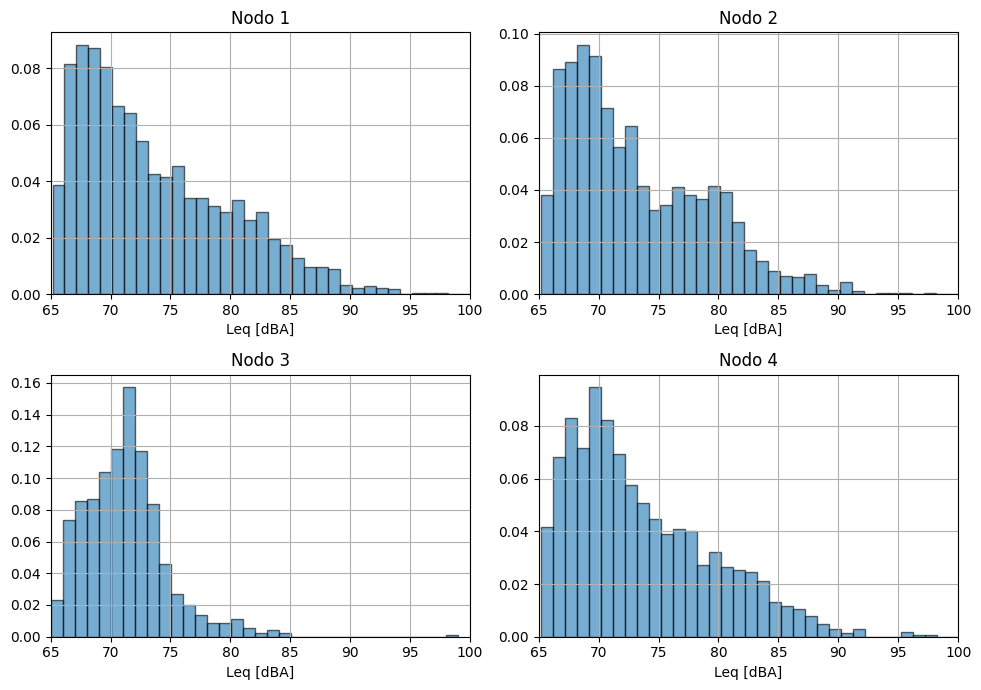

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bin_width = 1
sono=0
for i in range(2):
    for j in range(2):
        sono+=1
        # Calcular los bordes de los bins
        min_data = df_eventos[f'sono{sono}']['max_value'].min()
        max_data = df_eventos[f'sono{sono}']['max_value'].max()
        bins = np.arange(min_data, max_data + bin_width, bin_width)
        [n, bins, patches]=axs[i,j].hist(df_eventos[f'sono{sono}']['max_value'], bins=bins, edgecolor='k', alpha=0.6, density=True)
        # axs[i, j].set_title(f'Histograma normalizado\ndel valor máximo de los eventos ruidosos\nregistrados por el sonómetro {sono}')
        axs[i, j].set_title(f'Nodo {sono}')
        axs[i, j].set_xlabel('Leq [dBA]')
        # axs[0, 0].set_ylabel('Frecuencia')
        axs[i, j].grid(True)
        axs[i, j].set_xlim([65, 100])

fig.tight_layout()
plt.show()

## Hora de mayor ocurrencia de los eventos ruidosos
Hora de mayor ocurrencia de los eventos ruidosos y el número de eventos ruidosos registrados por cada nodo

In [75]:
df_eventos['sono4']['avg_value'].size

1616

In [76]:
# most_common_hour = events_df['start_time'].dt.hour.mode()[0]
# crear un dataframe con la hora de inicio de eventos mas comun
data=[]
ind=[]
col=['Hora_mas_comun', 'Numero_de_eventos']
for sono in df_eventos:
    df_eventos[sono]['start_time']=pd.to_datetime(df_eventos[sono]['start_time'])
    df_eventos[sono]['end_time']=pd.to_datetime(df_eventos[sono]['end_time'])
    most_common_hour = df_eventos[sono]['start_time'].dt.hour.mode()[0]
    numero_eventos = df_eventos[sono]['avg_value'].size
    data.append([most_common_hour, numero_eventos])
    ind.append(sono)
df_most_common_hour = pd.DataFrame(data, columns=col, index=ind)
df_most_common_hour

,Hora_mas_comun,Numero_de_eventos
sono1,21,1789
sono2,21,1703
sono3,11,897
sono4,21,1616
